In [6]:
import os 
import re
import cv2
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [16]:
frames = os.listdir("../data/raw/frames")
print(frames)

['176.png', '162.png', '189.png', '63.png', '200.png', '229.png', '62.png', '188.png', '163.png', '177.png', '175.png', '74.png', '48.png', '217.png', '49.png', '61.png', '164.png', '170.png', '158.png', '212.png', '206.png', '213.png', '171.png', '8.png', '72.png', '205.png', '211.png', '210.png', '204.png', '199.png', '67.png', '73.png', '9.png', '98.png', '115.png', '14.png', '15.png', '114.png', '128.png', '102.png', '116.png', '103.png', '13.png', '110.png', '104.png', '39.png', '38.png', '139.png', '105.png', '134.png', '120.png', '21.png', '20.png', '121.png', '135.png', '109.png', '123.png', '37.png', '122.png', '132.png', '27.png', '33.png', '32.png', '26.png', '133.png', '127.png', '25.png', '31.png', '19.png', '81.png', '157.png', '56.png', '194.png', '181.png', '195.png', '43.png', '57.png', '156.png', '80.png', '96.png', '168.png', '140.png', '55.png', '7.png', '223.png', '68.png', '182.png', '141.png', '97.png', '169.png', '145.png', '151.png', '87.png', '78.png', '186.pn

In [18]:
fr = frames[0]

fr = int(re.sub(".png", "", fr))



In [19]:

frames.sort(key= lambda frame : int(frame.split('.')[0]))
print(frames)

['0.png', '1.png', '2.png', '3.png', '7.png', '8.png', '9.png', '13.png', '14.png', '15.png', '19.png', '20.png', '21.png', '25.png', '26.png', '27.png', '31.png', '32.png', '33.png', '37.png', '38.png', '39.png', '43.png', '44.png', '48.png', '49.png', '50.png', '51.png', '55.png', '56.png', '57.png', '61.png', '62.png', '63.png', '67.png', '68.png', '72.png', '73.png', '74.png', '78.png', '79.png', '80.png', '81.png', '85.png', '86.png', '87.png', '91.png', '92.png', '96.png', '97.png', '98.png', '102.png', '103.png', '104.png', '105.png', '109.png', '110.png', '114.png', '115.png', '116.png', '120.png', '121.png', '122.png', '123.png', '127.png', '128.png', '132.png', '133.png', '134.png', '135.png', '139.png', '140.png', '141.png', '145.png', '146.png', '150.png', '151.png', '152.png', '156.png', '157.png', '158.png', '162.png', '163.png', '164.png', '168.png', '169.png', '170.png', '171.png', '175.png', '176.png', '177.png', '181.png', '182.png', '186.png', '187.png', '188.png', '

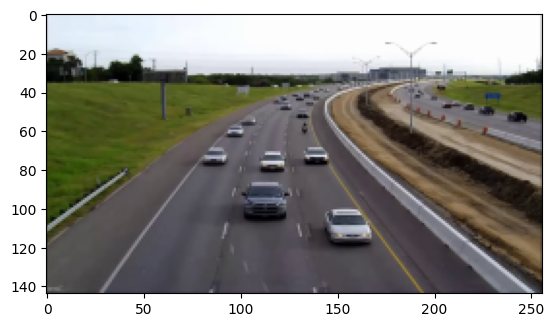

In [21]:
#  load images

images = [cv2.imread(f"{"../data/raw/frames"}/{i}") for i in frames]

plt.imshow(cv2.cvtColor(images[13], cv2.COLOR_BGR2RGB))
plt.show()

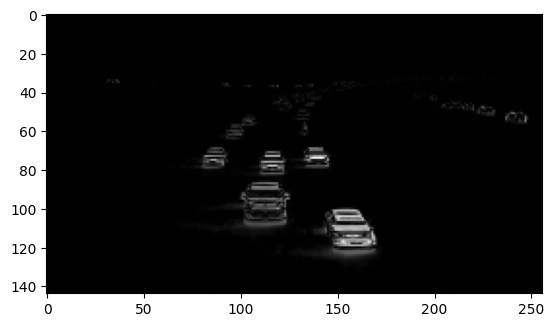

In [22]:

imgA = images[13]
imgB = images[14]
grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

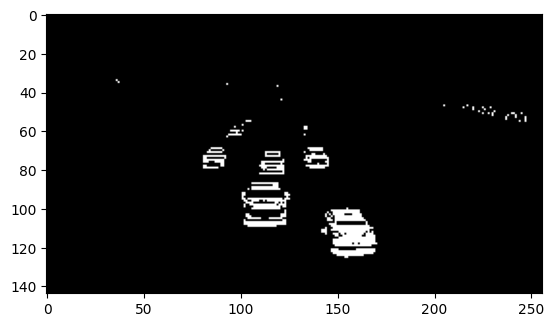

In [23]:
diff_images = cv2.absdiff(grayB, grayA)

# image thesholding
ret , thresh = cv2.threshold(diff_images, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

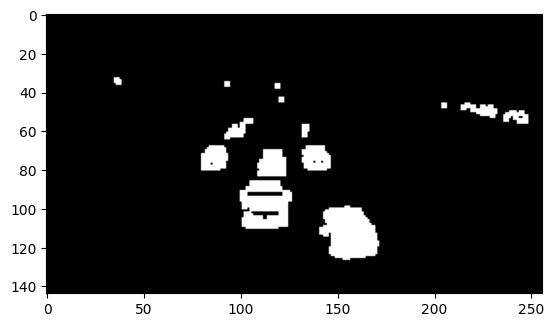

In [24]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

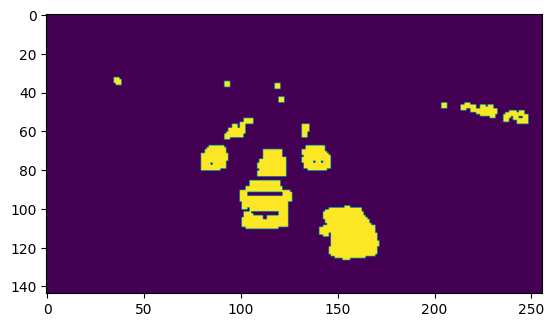

In [25]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0))
plt.show()

In [26]:
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [27]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

6

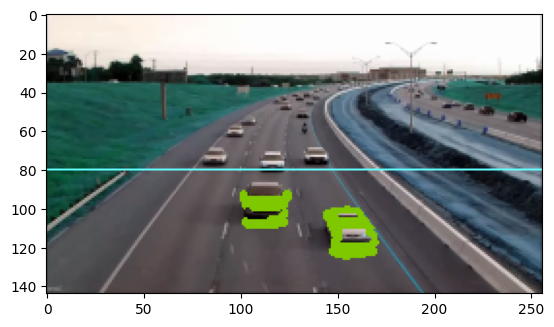

In [28]:
dmy = images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [ ]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "../data/interim/frames/"
if not os.path.exists(pathIn):
    os.makedirs(pathIn)

for i in range(len(images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

In [ ]:
# specify video name
pathOut = '../data/processed/vehicle_detection.mp4'

# specify frames per second
fps = 14.0

frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key= lambda file : int(file.split('.')[0]))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [34]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()